# Demo on TensorCircuit SDK for Tencent Quantum Cloud

This notebook is not served as a full user manual for TC SDK for qcloud. Instead it only highlighted a limited subset of features that TC enabled, mainly for live demo and tutorials.

## Import and Setup

In [1]:
import tensorcircuit as tc

The following two line are by default and no need to run explicitly, 
unless you activate tencent cloud service for the first time when you have to set up the token copied from the web

In [2]:
# tc.cloud.apis.set_token("foobar")
# tc.cloud.apis.set_provider("tencent")

## Devices and properties

We also support some third party and local providers, and the list will be expanding...


In [3]:
tc.cloud.apis.list_providers()

[tencent, local]

In [4]:
tc.cloud.apis.list_devices()

[tencent::simulator:aer,
 tencent::simulator:tcn1,
 tencent::simulator:tc,
 tencent::tianshu_s1,
 tencent::tianxuan_s1]

list on devices online that are currently available with `state` argument

In [5]:
tc.cloud.apis.list_devices("tencent", state="on")

[tencent::simulator:aer,
 tencent::simulator:tc,
 tencent::tianshu_s1,
 tencent::tianxuan_s1]

In [6]:
device_name = "tianxuan_s1"

In [7]:
# get the device object

d = tc.cloud.apis.get_device(device_name)

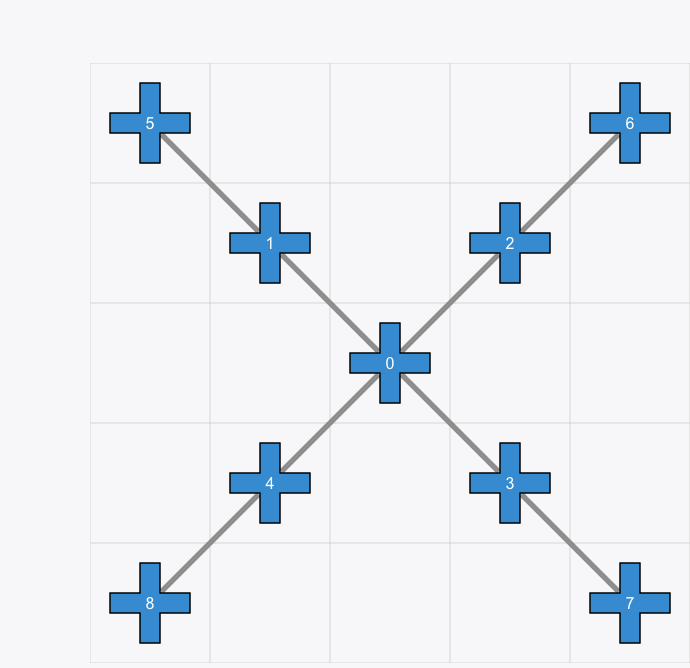

In [8]:
from IPython.display import Image

Image(filename="../statics/tianxuan_s1.png")

In [9]:
d.list_properties()

{'id': 'tianxuan_s1',
 'type': 'CHIP',
 'qubits': 9,
 'T1': 30.593555450439453,
 'T2': 12.94344425201416,
 'Err': {'SQ': 0.0007411111111111112,
  'CZ': 0.013063749999999999,
  'Readout': {'F0': 0.017955555555555554, 'F1': 0.06848888888888889}},
 'report': {'at': 1683908208,
  'consumed': 181292436838,
  'done': 32164,
  'total': 32175,
  'waiting': 5039},
 'at': 1684543057,
 'state': 'on',
 'links': {(0, 1): {'A': 0, 'B': 1, 'CZErrRate': 0.0132, 'GateLenInNs': 75.88},
  (0, 2): {'A': 0, 'B': 2, 'CZErrRate': 0.01678, 'GateLenInNs': 77.15},
  (0, 3): {'A': 0, 'B': 3, 'CZErrRate': 0.01603, 'GateLenInNs': 79.2},
  (0, 4): {'A': 0, 'B': 4, 'CZErrRate': 0.0183, 'GateLenInNs': 78.45},
  (1, 5): {'A': 1, 'B': 5, 'CZErrRate': 0.007, 'GateLenInNs': 73.28},
  (2, 6): {'A': 2, 'B': 6, 'CZErrRate': 0.02188, 'GateLenInNs': 78.1},
  (3, 7): {'A': 3, 'B': 7, 'CZErrRate': 0.00326, 'GateLenInNs': 63.79},
  (4, 8): {'A': 4, 'B': 8, 'CZErrRate': 0.00806, 'GateLenInNs': 79.64}},
 'bits': {0: {'Freqency': 3

In [10]:
d.list_properties()["bits"][8]

{'Freqency': 4335.36,
 'Qubit': 8,
 'ReadoutF0Err': 0.0151,
 'ReadoutF1Err': 0.0728,
 'SingleQubitErrRate': 0.00103,
 'SingleQubitGateLenInNs': 40,
 'T1': 30.782,
 'T2': 16.393}

In [11]:
# some meta data for the device

d.native_gates(), d.name, d.provider

(['h', 'rz', 'x', 'y', 'z', 'cz', 'cx'], 'tianxuan_s1', tencent)

In [12]:
# bidirectional coupling maps

d.topology()

[[0, 1],
 [6, 2],
 [4, 0],
 [0, 4],
 [8, 4],
 [1, 5],
 [3, 7],
 [0, 3],
 [2, 0],
 [5, 1],
 [3, 0],
 [7, 3],
 [0, 2],
 [2, 6],
 [4, 8],
 [1, 0]]

## Tasks

Submit a simple two-qubit task.

Note that there is no need to explicitly add any measurement operations to the circuit. By default, t.results will return the number of (Z-basis) measurement outcomes for all (in this case 2) qubits in the specified circuit

In [13]:
c = tc.Circuit(2)
c.H(0)
c.cx(0, 1)

t = tc.cloud.apis.submit_task(device=d, circuit=c, shots=1024)

t.results()  # this will wait until the result is return

{'00': 501, '11': 419, '10': 56, '01': 48}

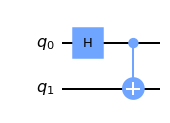

In [14]:
c.draw(output="mpl")

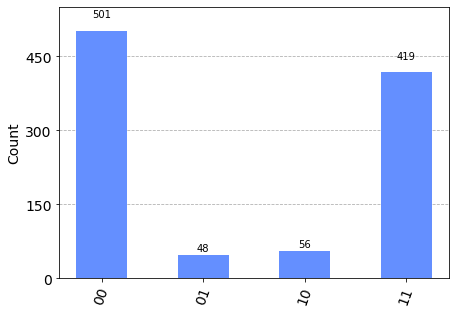

In [15]:
tc.results.counts.plot_histogram(t.results())

Check with the analytical exact result, using tensorcircuit's sota tensornetwork based simulation engine

In [16]:
p = c.probability()
print(p)
exact_result = tc.results.counts.vec2count(p, prune=True)
print(exact_result)

[0.49999997 0.         0.         0.49999997]
{'00': 0.4999999701976776, '11': 0.4999999701976776}


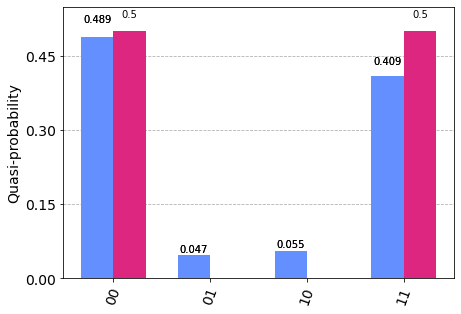

In [17]:
tc.results.counts.plot_histogram([t.results(), exact_result])

Let us further investigate the Task object ``t`` returned by ``submit_task``

In [18]:
t.details(prettify=True)

{'id': 'b29e6517-d1da-48fa-99d2-2ef7cd67e376',
 'queue': 'txq.low',
 'device': 'tianxuan_s1?o=3',
 'qubits': 2,
 'depth': 3,
 'state': 'completed',
 'shots': 1024,
 'prior': 1,
 'at': datetime.datetime(2023, 5, 22, 16, 28, 25, 529635),
 'ts': {'completed': datetime.datetime(2023, 5, 22, 16, 28, 25, 529635),
  'pending': datetime.datetime(2023, 5, 22, 16, 28, 23, 704629),
  'scheduled': datetime.datetime(2023, 5, 22, 16, 28, 23, 699405)},
 'md5': '9cb407b41938a256ec15dfec163dca1d',
 'runAt': 1684744128022598,
 'runDur': 1073553,
 'source': 'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q[2];\nh q[0];\ncx q[0],q[1];',
 'version': '1',
 'lang': 'OPENQASM',
 'result': {'00': 501, '01': 48, '10': 56, '11': 419},
 'optimization': {'progs': [{'code': 'Tencent Quantum Program\nversion 1.0\nqubit involved: q0,q1,q2,q3,q4,q5,q6,q7,q8\n# section: eqasm\n# section lines 3\neqasm program\nbs 1 H q0\nbs 1 CX (q0, q1)\nMEASZ q0,q1\n# section: end\n',
    'lang': 'QEXE'},
   {'code': 'Tencent Quantum Pro

In [19]:
t.status()

'completed'

In [20]:
t.id_

'b29e6517-d1da-48fa-99d2-2ef7cd67e376'

The task can be retrieved from cloud with the id without task object `t`

In [21]:
t1 = tc.cloud.apis.get_task(t.id_)

In [22]:
t1.details(prettify=True)["frontend"].draw()
# exactly the task we submitted

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

## Cloud simulator

We can also submit tasks to run on tc simulators on the cloud, the only thing you need to change is the device name

In [23]:
c = tc.Circuit(2)
c.H(0)
c.cx(0, 1)

t = tc.cloud.apis.submit_task(device="simulator:tc", circuit=c, shots=1024)

t.results()  # this will wait until the result is return
# instead, using wait=False for t.results(wait=False), the task objects can be returned in async mode

{'00': 520, '11': 504}

**Batch submission:** Tasks can also submitted in batch, either on real devices or on simulators, a list of task object is returned by ``submit_task``, if the circuit submitted is in a list

In [24]:
c1 = tc.Circuit(2)
c1.h(0)

c2 = tc.Circuit(2)
c2.h(1)

ts = tc.cloud.apis.submit_task(device=d, circuit=[c1, c2], shots=1024)
for t in ts:
    print(t.results())

{'10': 528, '00': 475, '11': 12, '01': 9}
{'00': 524, '01': 479, '10': 14, '11': 7}


## Compling: gate decomposition and qubit mapping

Say we want to simulate the following logic circuit, however, the gate set and the coupling for two-qubit gates are both incompatible with our real device

In [25]:
c = tc.Circuit(5)
c.rx(0, theta=1.57)
for i in range(4):
    c.cx(i, i + 1)
c.measure_instruction(*range(5))
# note for tasks involving qubit mapping, we recommend you add the measure instruction explicitly
c.draw()

┌──────────┐          ┌─┐                      
q_0: ┤ Rx(1.57) ├──■───────┤M├──────────────────────
     └──────────┘┌─┴─┐     └╥┘     ┌─┐              
q_1: ────────────┤ X ├──■───╫──────┤M├──────────────
                 └───┘┌─┴─┐ ║      └╥┘     ┌─┐      
q_2: ─────────────────┤ X ├─╫───■───╫──────┤M├──────
                      └───┘ ║ ┌─┴─┐ ║      └╥┘┌─┐   
q_3: ───────────────────────╫─┤ X ├─╫───■───╫─┤M├───
                            ║ └───┘ ║ ┌─┴─┐ ║ └╥┘┌─┐
q_4: ───────────────────────╫───────╫─┤ X ├─╫──╫─┤M├
                            ║       ║ └───┘ ║  ║ └╥┘
c: 5/═══════════════════════╩═══════╩═══════╩══╩══╩═
                            0       1       2  3  4

In [26]:
# the ideal answer
c.sample(allow_state=True, batch=1024, format="count_dict_bin")

{'00000': 541, '11111': 483}

By default the backend compiler options are both enabled which we write expicitly below

In [27]:
t = tc.cloud.apis.submit_task(
    circuit=c,
    shots=1024,
    device=d,
    enable_qos_gate_decomposition=True,
    enable_qos_qubit_mapping=True,
)

In [28]:
t.results()

{'00000': 460,
 '11111': 246,
 '01111': 43,
 '10000': 31,
 '11101': 29,
 '00011': 22,
 '11100': 21,
 '11011': 18,
 '00100': 17,
 '10111': 17,
 '11110': 17,
 '11000': 12,
 '00001': 11,
 '00010': 11,
 '10100': 10,
 '00111': 9,
 '01000': 8,
 '01011': 7,
 '10011': 7,
 '10101': 4,
 '00110': 3,
 '01110': 3,
 '10001': 3,
 '10110': 3,
 '11010': 3,
 '01010': 2,
 '01100': 2,
 '01101': 2,
 '00101': 1,
 '10010': 1,
 '11001': 1}

We can inspect the circuit compiled after the backend server compiling:

In [29]:
t.details(prettify=True)["backend"].draw(idle_wires=False)

┌────────────┐┌───┐┌───┐┌────────────┐┌────────────┐┌─────────────┐»
q_0: ┤ Rz(1.5708) ├┤ S ├┤ H ├┤ Rz(0.7854) ├┤ Rz(0.3927) ├┤ Rz(0.19635) ├»
     └────────────┘└───┘└───┘└────────────┘└────────────┘└─────────────┘»
q_1: ───────────────────────────────────────────────────────────────────»
                                                                        »
q_2: ───────────────────────────────────────────────────────────────────»
                                                                        »
q_3: ───────────────────────────────────────────────────────────────────»
                                                                        »
q_4: ───────────────────────────────────────────────────────────────────»
                                                                        »
«     ┌──────────────┐┌──────────────┐┌──────────────┐┌──────────────┐»
«q_0: ┤ Rz(0.098175) ├┤ Rz(0.049087) ├┤ Rz(0.024544) ├┤ Rz(0.012272) ├»
«     └──────────────┘└──────────────┘└──────────────┘└──────────────┘»
«q_1: ────────────────────────────────────────────────────────────────»
«                                                                     »
«q_2: ────────────────────────────────────────────────────────────────»
«                                                                     »
«q_3: ────────────────────────────────────────────────────────────────»
«                                                                     »
«q_4: ────────────────────────────────────────────────────────────────»
«                                                                     »
«     ┌───────────────┐┌──────────────┐┌──────────────┐┌───────────────┐»
«q_0: ┤ Rz(0.0061359) ├┤ Rz(0.003068) ├┤ Rz(0.001534) ├┤ Rz(0.0003835) ├»
«     └───────────────┘└──────────────┘└──────────────┘└───────────────┘»
«q_1: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_2: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_3: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«q_4: ──────────────────────────────────────────────────────────────────»
«                                                                       »
«     ┌────────────────┐┌────────────────┐┌───┐┌─────┐┌────────────┐»
«q_0: ┤ Rz(0.00019175) ├┤ Rz(9.5874e-05) ├┤ H ├┤ Sdg ├┤ Rz(3.1416) ├»
«     └────────────────┘└────────────────┘└───┘└─────┘└────────────┘»
«q_1: ──────────────────────────────────────────────────────────────»
«                                                                   »
«q_2: ──────────────────────────────────────────────────────────────»
«                                                                   »
«q_3: ──────────────────────────────────────────────────────────────»
«                                                                   »
«q_4: ──────────────────────────────────────────────────────────────»
«                                                                   »
«     ┌────────────┐          ┌───┐          ┌───┐     ┌───┐┌───┐     
«q_0: ┤ Rz(1.5708) ├──■────■──┤ X ├──■────■──┤ X ├──■──┤ X ├┤ X ├──■──
«     └────────────┘┌─┴─┐┌─┴─┐└─┬─┘┌─┴─┐  │  └─┬─┘  │  └─┬─┘└─┬─┘  │  
«q_1: ──────────────┤ X ├┤ X ├──■──┤ X ├──┼────┼────┼────┼────┼────┼──
«                   └───┘└───┘     └───┘┌─┴─┐  │    │    │    │    │  
«q_2: ──────────────────────────────────┤ X ├──┼────┼────┼────■────┼──
«                                       └───┘  │  ┌─┴─┐  │         │  
«q_3: ─────────────────────────────────────────■──┤ X ├──■─────────┼──
«                                                 └───┘          ┌─┴─┐
«q_4: ───────────────────────────────────────────────────────────┤ X ├
«                                                                └───┘

In [30]:
t.get_logical_physical_mapping()  # the logical qubit - physical qubit mapping is also returned by the server

{0: 1, 1: 3, 2: 2, 3: 0, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}

To better customize and use the advanced compiling system, we strongly recommend the users to compile the circuit before task submission

In [31]:
c1, info = tc.compiler.default_compile(
    c, compiled_options={"coupling_map": d.topology()}
)
print(info)
c1.draw(idle_wires=False)

{'logical_physical_mapping': {0: 6, 1: 2, 2: 0, 3: 3, 4: 7}, 'positional_logical_mapping': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}}


┌───┐             ┌─┐      
q_0: ───────────────────────────┤ X ├──■──────────┤M├──────
                           ┌───┐└─┬─┘  │  ┌─┐     └╥┘      
q_2: ──────────────────────┤ X ├──■────┼──┤M├──────╫───────
                           └─┬─┘     ┌─┴─┐└╥┘      ║ ┌─┐   
q_3: ────────────────────────┼───────┤ X ├─╫───■───╫─┤M├───
     ┌───┐┌──────────┐┌───┐  │   ┌─┐ └───┘ ║   │   ║ └╥┘   
q_6: ┤ H ├┤ Rz(1.57) ├┤ H ├──■───┤M├───────╫───┼───╫──╫────
     └───┘└──────────┘└───┘      └╥┘       ║ ┌─┴─┐ ║  ║ ┌─┐
q_7: ─────────────────────────────╫────────╫─┤ X ├─╫──╫─┤M├
                                  ║        ║ └───┘ ║  ║ └╥┘
c: 9/═════════════════════════════╩════════╩═══════╩══╩══╩═
                                  6        2       0  3  7

We now submit the compiled circuit ``c1`` for the qcloud, with now the ``logical_physical_mapping`` in ``info``, the result is improved with tc built in compiler

In [32]:
t = tc.cloud.apis.submit_task(
    circuit=c1,
    shots=1024,
    device=d,
    enable_qos_gate_decomposition=False,
    enable_qos_qubit_mapping=False,
)
t.results()

{'00000': 442,
 '11111': 295,
 '01111': 66,
 '11011': 34,
 '11110': 29,
 '10000': 26,
 '10111': 22,
 '11101': 16,
 '11000': 15,
 '01000': 14,
 '00111': 11,
 '11100': 10,
 '00011': 9,
 '00100': 5,
 '01011': 5,
 '10011': 5,
 '01101': 4,
 '11001': 4,
 '01100': 3,
 '01110': 3,
 '00001': 2,
 '00010': 1,
 '00110': 1,
 '10110': 1,
 '11010': 1}

## Readout Error Mitigation

The results can be further improved via readout error mitigation

In [33]:
mit = tc.results.rem.ReadoutMit(d.name + "?o=0")
mit.cals_from_system(9)
mr = mit.apply_correction(t.results(), qubits=5, **info)
mr

{'00000': 496.04758924971736,
 '11111': 425.0199159717411,
 '01111': 47.435856968160266,
 '11000': 13.069671146547593,
 '11110': 11.714948398147767,
 '11100': 9.142744304288023,
 '00111': 7.038018388943233,
 '00011': 6.1005198202968645,
 '10111': 5.016879874015307,
 '10000': 2.2494050992135244,
 '11101': 1.164450778928778}

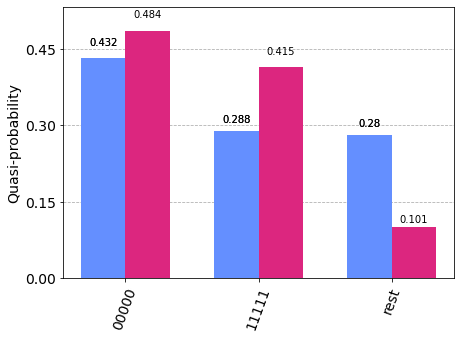

In [34]:
tc.results.counts.plot_histogram([t.results(), mr], number_to_keep=2)

We can also collect the readout calibriation from the API, but the results can be wrose since it is not up to date

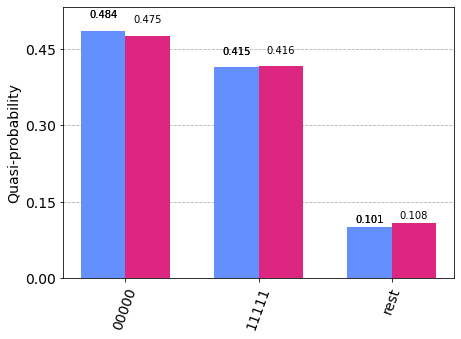

In [35]:
mit1 = tc.results.rem.ReadoutMit(d.name + "?o=0")
mit1.cals_from_api(9)
mr1 = mit1.apply_correction(t.results(), qubits=5, **info)
tc.results.counts.plot_histogram([mr, mr1], number_to_keep=2)

Readout error mitigation in tc supports many other options for subset measurement, scalable mitigation for hundereds of qubits, customized calibriation in local and global mode and native error mitigated expectations, please refer to the API documentation for more interesting usages. For example, we can directly compute the expectation $<Z_0Z_1>$ (ideal value should be 1) as

In [36]:
c.expectation_ps(z=[0, 1]), mit.expectation(t.results(), [0, 1])

(array(1.+0.j, dtype=complex64), 0.9555765968884041)

## High level API

Ultimately, for near term quantum computing tasks, the users only want to evaluate some given observable expectation for a circuit without worrying too much details above: compilation, error mitigation, subset measruement, positional/logical/physical mapping etc. Therefore, for most of the applications, `batch_expectation_ps` method is all you need.

In [37]:
tc.cloud.wrapper.batch_expectation_ps(c, pss=[[3, 3, 0, 0, 0]], device=d)
# compute Z0Z1

array([0.90996515])

In [38]:
tc.cloud.wrapper.batch_expectation_ps(
    c, pss=[[3, 3, 0, 0, 0], [0, 3, 3, 0, 0]], device=d, ws=[1, 0.5]
)
# compute Z0Z1 + 0.5*Z1Z2

array(1.70569329)

The interface is also unifying the numerical simulation (exact) interface with QPU experiments, by spcifying the device as ``None``, we can obtain the expected result from tc simulator

In [39]:
tc.cloud.wrapper.batch_expectation_ps(
    c, pss=[[3, 3, 0, 0, 0], [0, 3, 3, 0, 0]], device=None, ws=[1, 0.5]
)

1.5

The results with readout error mitigation disabled can become worse. Note how we cache the readout error calibriation within tc, so that REM is effcient to use

In [40]:
tc.cloud.wrapper.batch_expectation_ps(
    c, pss=[[3, 3, 0, 0, 0], [0, 3, 3, 0, 0]], device=d, ws=[1, 0.5], with_rem=False
)

array(1.25073242)

**QPU support for tf/torch ML:** Above this API, we also have corresponding keras and torch layers for hybrid deployment

In [41]:
import tensorflow as tf
from functools import partial
import logging

tc.set_backend("tensorflow")
logger = logging.getLogger("tensorcircuit")
logger.setLevel(logging.INFO)
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)
logger.addHandler(ch)

pss = []
for i in range(5):
    ps = [0 for _ in range(5)]
    ps[i] = 3  # Z_i
    pss.append(ps)
print("Z_i:", pss)


def quantum_func(inputs, weights, device=None):
    c = tc.Circuit(5)
    for i in range(5):
        c.rx(i, theta=inputs[i])
    for i in range(5):
        c.rz(i, theta=weights[0, i])
    for i in range(5):
        c.rx(i, theta=weights[1, i])
    return tc.cloud.wrapper.batch_expectation_ps(c, pss=pss, device=device)


qlayer = tc.KerasHardwareLayer(quantum_func, [2, 5])
model = tf.keras.Sequential([qlayer, tf.keras.layers.Dense(1)])
inputs = tf.stack([0.1 * tf.ones([5]), 0.2 * tf.ones([5])])
model(inputs)

the contraction path is given as [(0, 1), (0, 1), (0, 1), (0, 1)]
----- WRITE: 7.20945336562895 --------

the contraction path is given as [(0, 2), (0, 1)]
----- WRITE: 6.189824558880018 --------

the contraction path is given as [(0, 1), (0, 1)]
----- WRITE: 6.189824558880018 --------

the contraction path is given as [(0, 1), (0, 1)]
----- WRITE: 6.189824558880018 --------

the contraction path is given as [(0, 1), (0, 1)]
----- WRITE: 6.189824558880018 --------

the contraction path is given as [(0, 1), (0, 1)]
----- WRITE: 6.189824558880018 --------

the contraction path is given as [(0, 1), (0, 1), (0, 1), (0, 1)]
----- WRITE: 7.20945336562895 --------

the contraction path is given as [(0, 2), (0, 1)]
----- WRITE: 6.189824558880018 --------

the contraction path is given as [(0, 1), (0, 1)]
----- WRITE: 6.189824558880018 --------

the contraction path is given as [(0, 1), (0, 1)]
----- WRITE: 6.189824558880018 --------

the contraction path is given as [(0, 1), (0, 1)]
----- WRIT

Z_i: [[3, 0, 0, 0, 0], [0, 3, 0, 0, 0], [0, 0, 3, 0, 0], [0, 0, 0, 3, 0], [0, 0, 0, 0, 3]]


<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.0395856],
       [1.0022404]], dtype=float32)>

In [42]:
qlayer1 = tc.KerasHardwareLayer(partial(quantum_func, device=d), [2, 5])
model1 = tf.keras.Sequential([qlayer1, tf.keras.layers.Dense(1)])
model1(inputs)

submit task on tencent::tianxuan_s1 for 1 circuits
finished collecting count results of 1 tasks in 5.1344 seconds
submit task on tencent::tianxuan_s1 for 1 circuits
finished collecting count results of 1 tasks in 5.0256 seconds


<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.29613853],
       [0.2767151 ]], dtype=float32)>

we align the weights between the two models

In [43]:
model1.set_weights(model.get_weights())
model1(inputs)

submit task on tencent::tianxuan_s1 for 1 circuits
finished collecting count results of 1 tasks in 4.121 seconds
submit task on tencent::tianxuan_s1 for 1 circuits
finished collecting count results of 1 tasks in 4.0726 seconds


<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.1063409],
       [1.0842923]], dtype=float32)>

In [44]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hardware_layer_1 (HardwareL  multiple                 10        
 ayer)                                                           
                                                                 
 dense_1 (Dense)             multiple                  6         
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________
